### Importing all the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Importing Train and Test data sets

In [2]:
train = pd.read_csv("/content/drive/MyDrive/Datasets/Train_TS.csv")
test = pd.read_csv("/content/drive/MyDrive/Datasets/Test_TS.csv")

Lets make a copy of train and test data so that even if we do changes in these dataset we do not lose the original dataset.

In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [5]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [6]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [7]:
train['Datetime'] = pd.to_datetime(train.Datetime, format= '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format= '%d-%m-%Y %H:%M')

train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format= '%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format= '%d-%m-%Y %H:%M')

In [8]:
for i in (train, test, test_original, train_original):
  i['year'] = i.Datetime.dt.year
  i['month'] = i.Datetime.dt.month
  i['day'] = i.Datetime.dt.day
  i['Hour'] = i.Datetime.dt.hour

In [9]:
train['day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [10]:
def applyer(row):
  if row.dayofweek == 5 or row.dayofweek == 6:
    return 1
  else:
    return 0

temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2


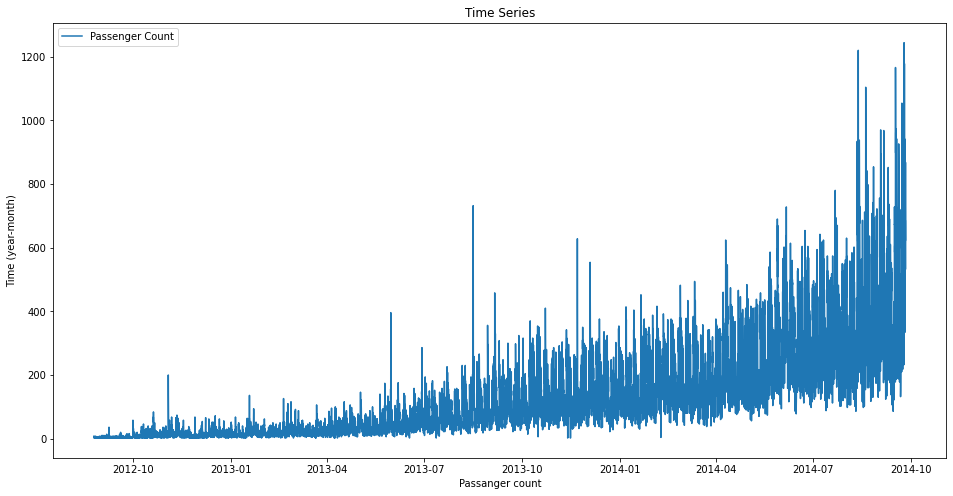

In [11]:
train.index = train['Datetime']

df = train.drop('ID', 1)

ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title("Time Series")
plt.ylabel("Time (year-month)")
plt.xlabel("Passanger count")
plt.legend(loc='best')

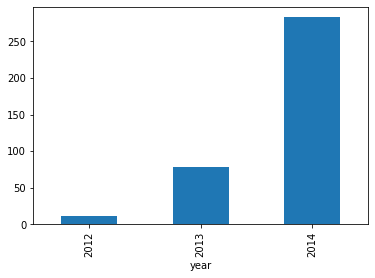

In [12]:
train.groupby('year')['Count'].mean().plot.bar()

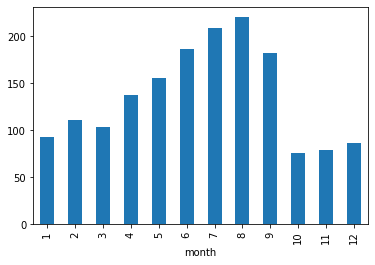

In [13]:
train.groupby('month')['Count'].mean().plot.bar()

In [14]:
temp = train.groupby(['year', 'month'])['Count'].mean()

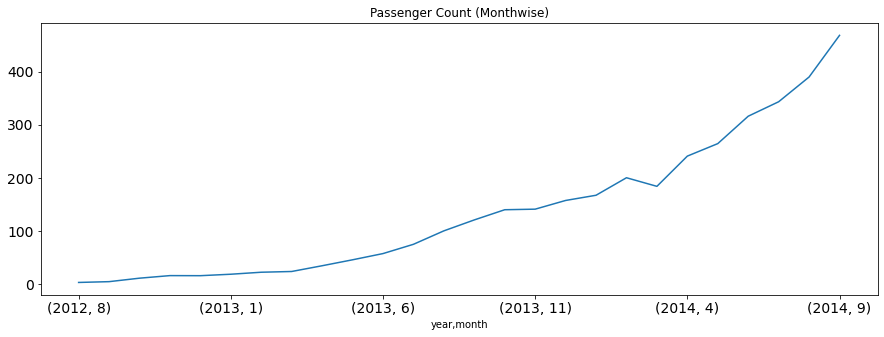

In [16]:
temp.plot(figsize=(15,5), title = 'Passenger Count (Monthwise)', fontsize=14)

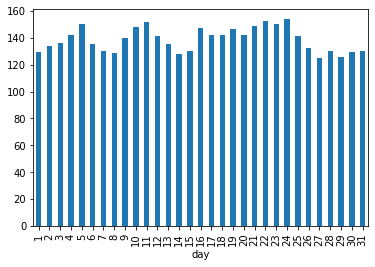

In [17]:
train.groupby('day')['Count'].mean().plot.bar()

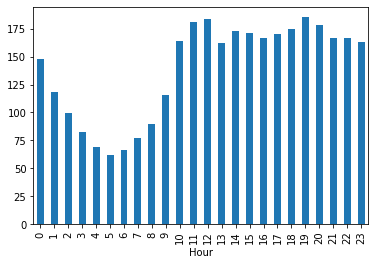

In [18]:
train.groupby('Hour')['Count'].mean().plot.bar()

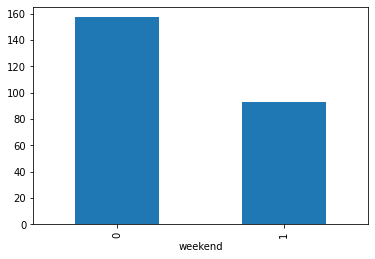

In [19]:
train.groupby('weekend')['Count'].mean().plot.bar()

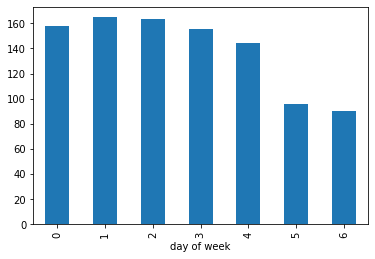

In [20]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [21]:
train = train.drop('ID', 1)

In [22]:
train.Timestamp = pd.to_datetime(train.Datetime, 
                                 format = '%d-%m-%Y %H:%M')

train.index = train.Timestamp

#Hourly time series
hourly = train.resample('H').mean()

#Converting to daily mean
daily = train.resample('D').mean()

#Converting to weekly mean
weekly = train.resample('W').mean()

#Converting to monthly mean
monthly = train.resample('M').mean()

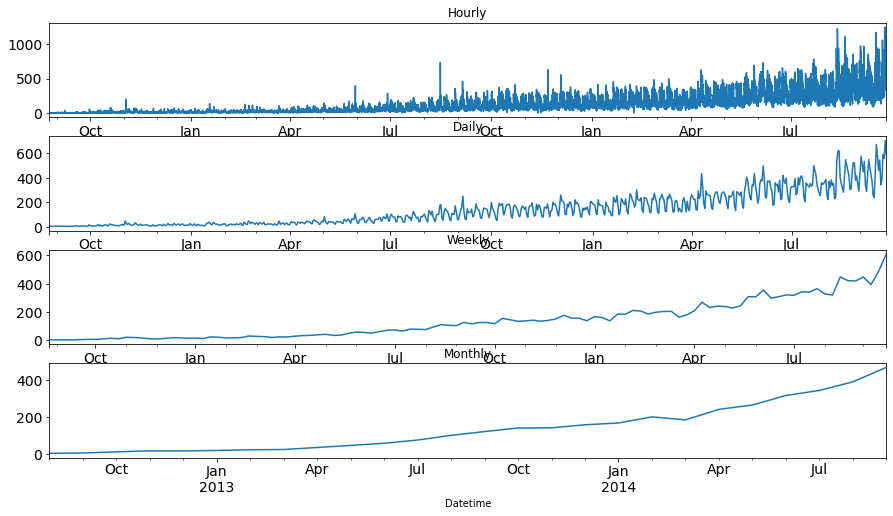

In [24]:
fig, axs = plt.subplots(4, 1)

hourly.Count.plot(figsize = (15, 8), title = 'Hourly',
                  fontsize = 14, ax = axs[0])
daily.Count.plot(figsize = (15, 8), title = 'Daily',
                  fontsize = 14, ax = axs[1])
weekly.Count.plot(figsize = (15, 8), title = 'Weekly',
                  fontsize = 14, ax = axs[2])
monthly.Count.plot(figsize = (15, 8), title = 'Monthly',
                  fontsize = 14, ax = axs[3])

In [25]:
test.Timestamp = pd.to_datetime(test.Datetime, 
                                format = '%d-%m-%Y %H:%M')

test.index = test.Timestamp

#Converting to daily mean
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime,
                                 format = '%d-%m-%Y %H:%M')
train.index = train.Timestamp

#Converting to daily mean
train = train.resample('D').mean()

In [27]:
Train = train['2012-08-25':'2014-06-24']
valid = train['2014-06-25':'2014-09-25']

In [28]:
Train.head(), Train.tail()

(               Count    year  month   day  Hour  day of week  weekend
 Datetime                                                             
 2012-08-25  3.166667  2012.0    8.0  25.0  11.5          5.0      1.0
 2012-08-26  3.666667  2012.0    8.0  26.0  11.5          6.0      1.0
 2012-08-27  2.583333  2012.0    8.0  27.0  11.5          0.0      0.0
 2012-08-28  2.416667  2012.0    8.0  28.0  11.5          1.0      0.0
 2012-08-29  2.500000  2012.0    8.0  29.0  11.5          2.0      0.0,
                  Count    year  month   day  Hour  day of week  weekend
 Datetime                                                               
 2014-06-20  379.916667  2014.0    6.0  20.0  11.5          4.0      0.0
 2014-06-21  220.083333  2014.0    6.0  21.0  11.5          5.0      1.0
 2014-06-22  230.833333  2014.0    6.0  22.0  11.5          6.0      1.0
 2014-06-23  419.416667  2014.0    6.0  23.0  11.5          0.0      0.0
 2014-06-24  372.166667  2014.0    6.0  24.0  11.5          1.0 

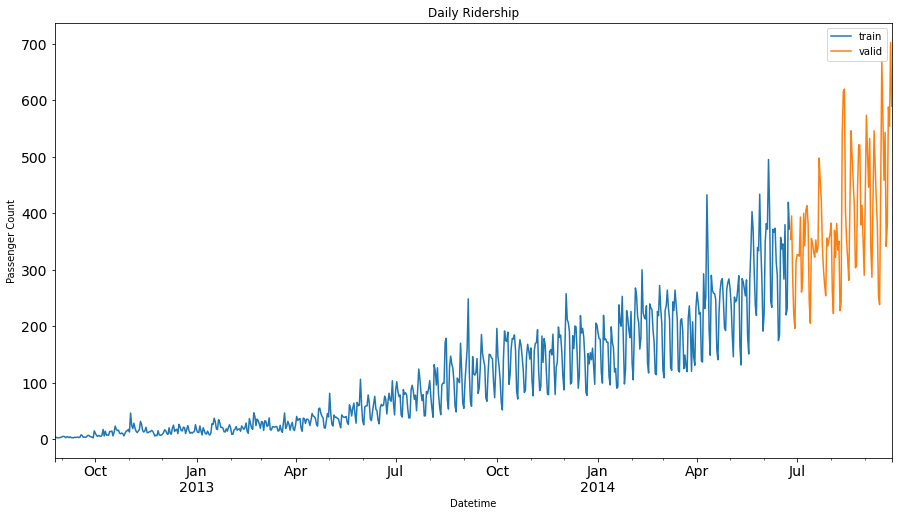

In [30]:
Train.Count.plot(figsize=(15, 8), title = 'Daily Ridership',
                 fontsize = 14, label = 'train')

valid.Count.plot(figsize=(15,8), title = 'Daily Ridership',
                 fontsize=14, label='valid')

plt.xlabel("Datetime")
plt.ylabel("Passenger Count")
plt.legend(loc='best')
plt.show()

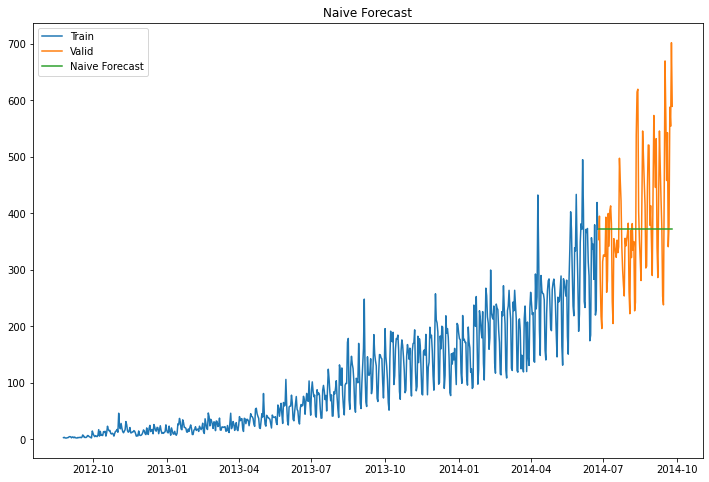

In [32]:
dd = np.asarray(Train.Count)

y_hat = valid.copy()
y_hat['naive'] = dd[len(dd) - 1]

plt.figure(figsize=(12, 8))
plt.plot(Train.index, Train['Count'], label = 'Train')
plt.plot(valid.index, valid['Count'], label = 'Valid')
plt.plot(y_hat.index, y_hat['naive'], label = 'Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))

print(rms)

111.79050467496724


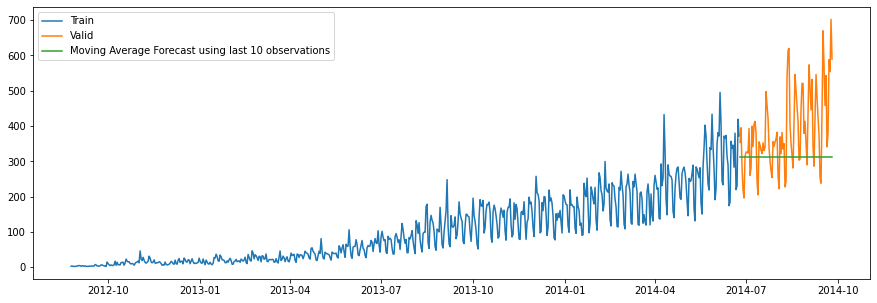

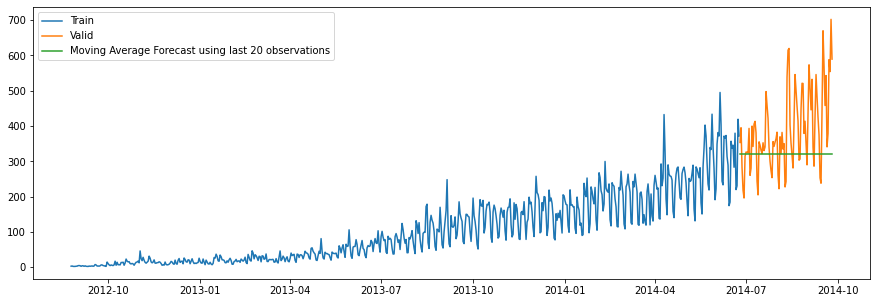

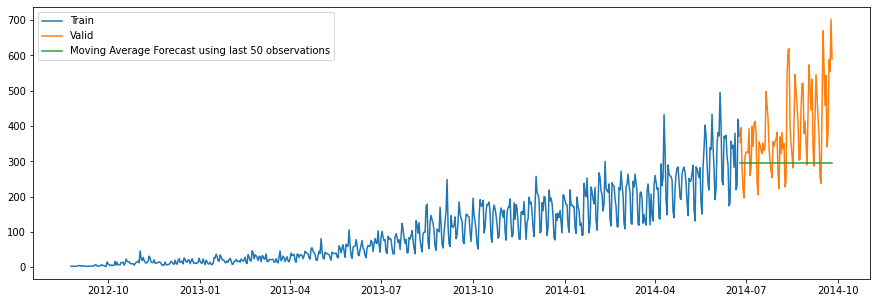

In [36]:
# average for last 10 observations
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]

plt.figure(figsize=(15, 5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], 
         label = 'Moving Average Forecast using last 10 observations')
plt.legend(loc='best')
plt.show()


# average for last 20 observations
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1]

plt.figure(figsize=(15, 5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label = 'Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], 
         label = 'Moving Average Forecast using last 20 observations')
plt.legend(loc='best')
plt.show()


# average for last 50 observations
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1]

plt.figure(figsize=(15, 5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label = 'Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], 
         label = 'Moving Average Forecast using last 50 observations')
plt.legend(loc='best')
plt.show()

In [37]:
rms = sqrt(mean_squared_error(valid.Count, 
                              y_hat_avg.moving_avg_forecast))

print(rms)

144.19175679986802


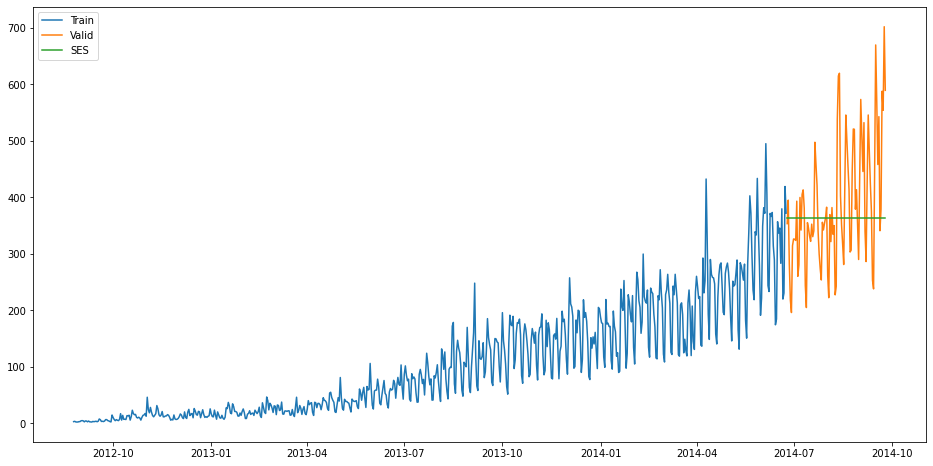

In [38]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_avg = valid.copy()

fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,
                                                          optimized=False)

y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Valid')
plt.plot(y_hat_avg['SES'], label = 'SES')
plt.legend(loc = 'best')
plt.show()

In [39]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES))

print(rms)

113.43708111884514


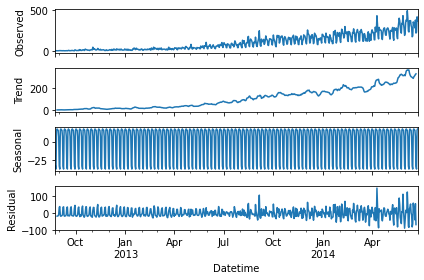

In [41]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

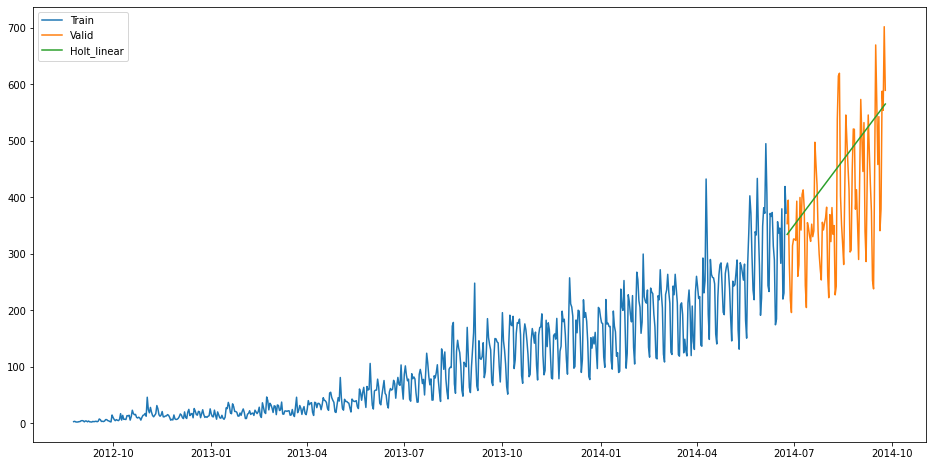

In [42]:
y_hat_avg = valid.copy()

fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level=0.3,
                                            smoothing_slope=0.1)

y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))

plt.figure(figsize=(16, 8))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Valid')
plt.plot(y_hat_avg['Holt_linear'], label = 'Holt_linear')
plt.legend(loc = 'best')
plt.show()

In [43]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear))

print(rms)

112.94278345314041


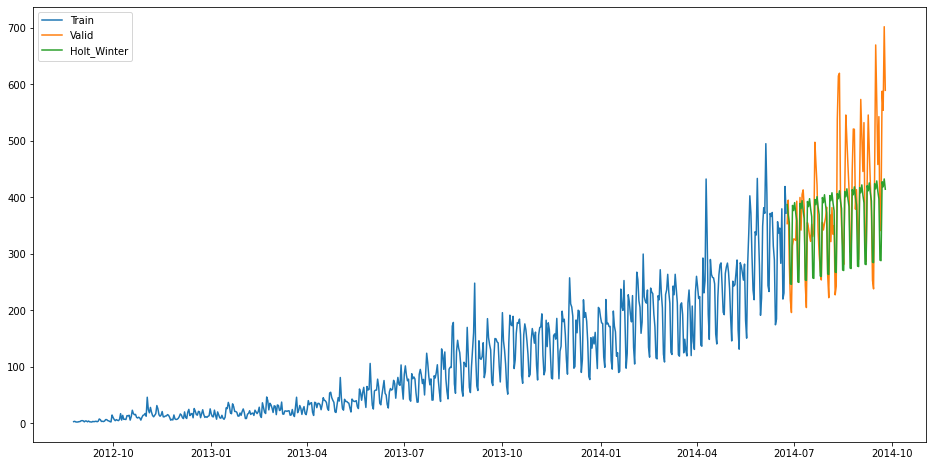

In [44]:
y_hat_avg = valid.copy()

fit1 = ExponentialSmoothing(np.asarray(Train['Count']),
                            seasonal_periods=7, trend = 'add',
                            seasonal='add').fit()

y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))

plt.figure(figsize=(16, 8))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Valid')
plt.plot(y_hat_avg['Holt_Winter'], label = 'Holt_Winter')
plt.legend(loc = 'best')
plt.show()

In [46]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter))

print(rms)

82.37571191747172


In [59]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  #Determing rolling statistics
  rolmean = train_original.rolling(24).mean() # 24 hrs on each day
  rolstd = train_original.rolling(24).std()

  #Perform Dickey-Fuller test:
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value',
                                           '#Lags Used', 'No.of observations Used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
  print(dfoutput)



test_stationarity(train_original['Count'])

Results of Dickey-Fuller Test:
Test Statistic                -4.456561
p-value                        0.000235
#Lags Used                    45.000000
No.of observations Used    18242.000000
Critical Value (1%)           -3.430709
Critical Value (5%)           -2.861698
Critical Value (10%)          -2.566854
dtype: float64


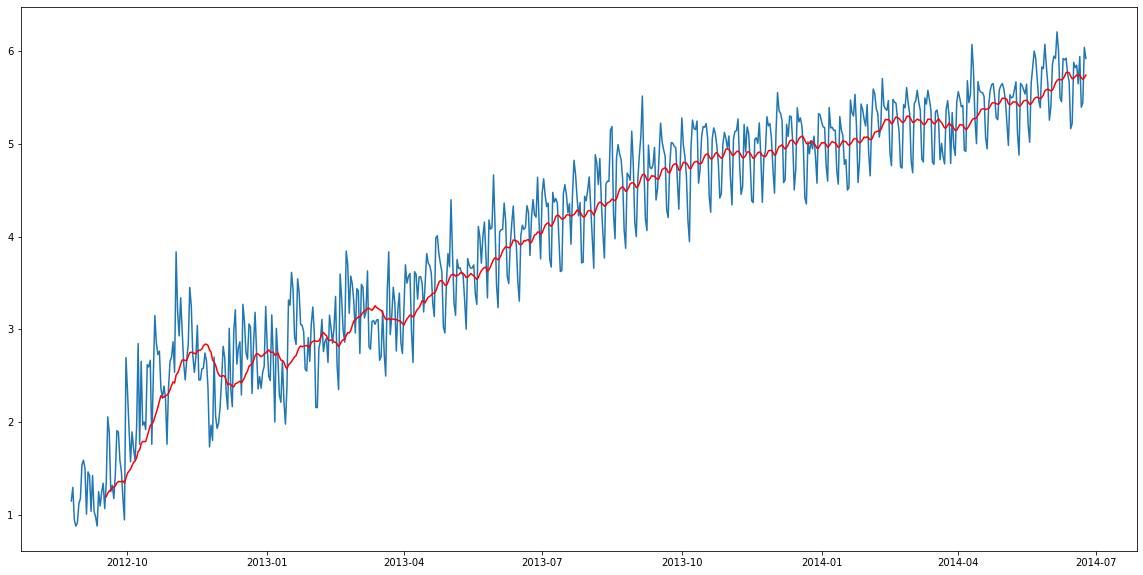

In [63]:
Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

moving_avg = Train_log.rolling(24).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')
plt.show()

In [64]:
train_log_moving_avg_diff = Train_log - moving_avg

In [65]:
train_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(train_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic            -5.861646e+00
p-value                    3.399422e-07
#Lags Used                 2.000000e+01
No.of observations Used    6.250000e+02
Critical Value (1%)       -3.440856e+00
Critical Value (5%)       -2.866175e+00
Critical Value (10%)      -2.569239e+00
dtype: float64


In [67]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

Results of Dickey-Fuller Test:
Test Statistic            -8.237568e+00
p-value                    5.834049e-13
#Lags Used                 1.900000e+01
No.of observations Used    6.480000e+02
Critical Value (1%)       -3.440482e+00
Critical Value (5%)       -2.866011e+00
Critical Value (10%)      -2.569151e+00
dtype: float64


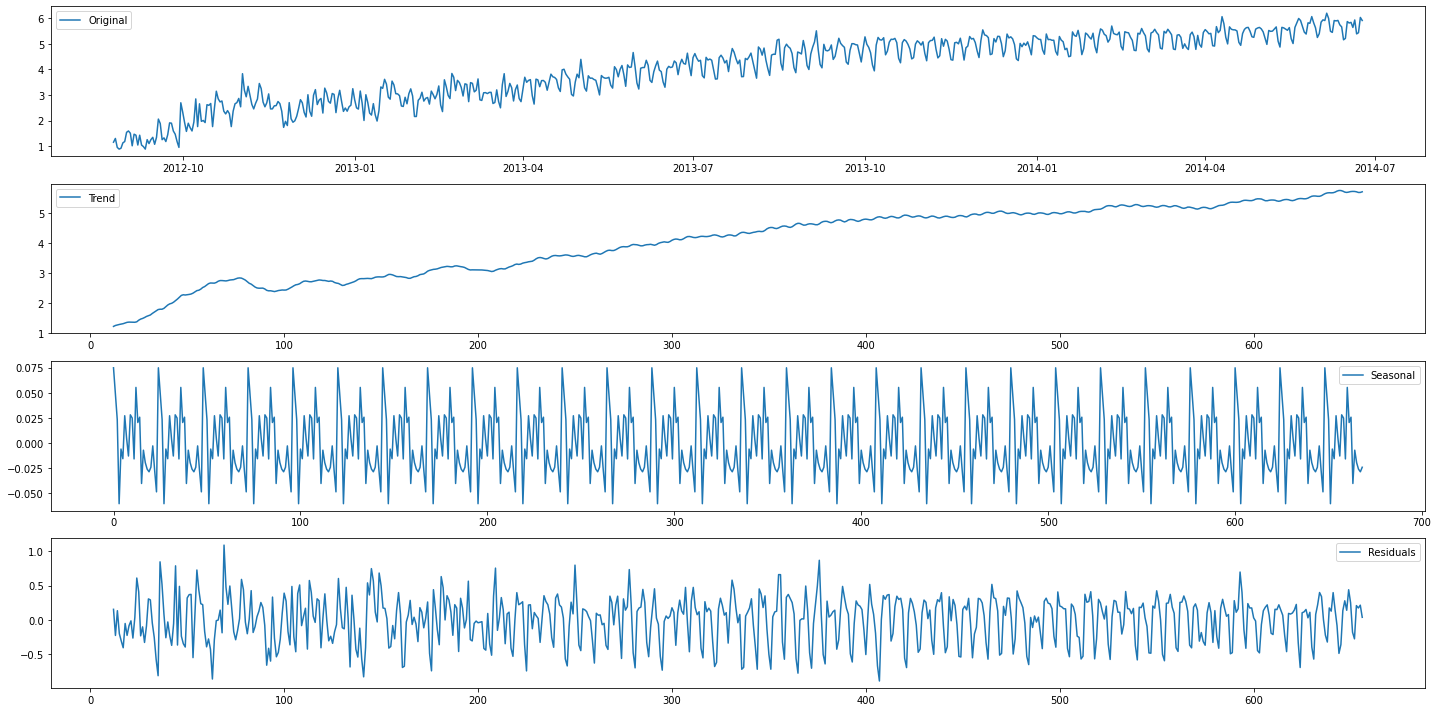

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(pd.DataFrame(Train_log).Count.values,
                               freq = 24)

trend = decompose.trend
seasonal = decompose.seasonal
residual = decompose.resid

plt.subplot(411)
plt.plot(Train_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [70]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace=True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose[0])

Results of Dickey-Fuller Test:
Test Statistic            -7.822096e+00
p-value                    6.628321e-12
#Lags Used                 2.000000e+01
No.of observations Used    6.240000e+02
Critical Value (1%)       -3.440873e+00
Critical Value (5%)       -2.866183e+00
Critical Value (10%)      -2.569243e+00
dtype: float64


In [72]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

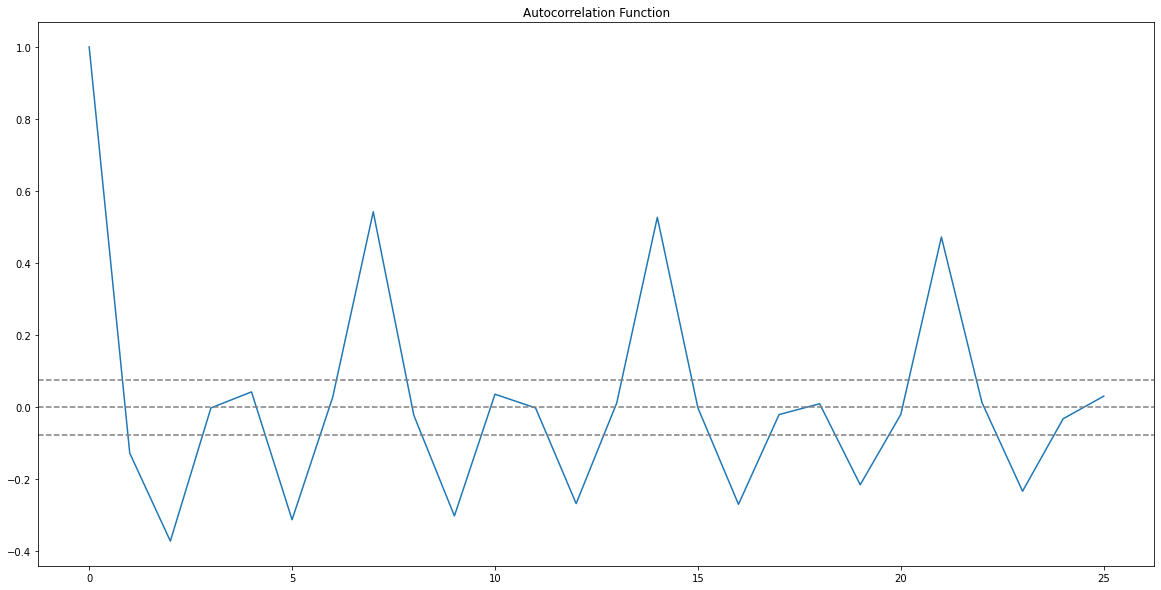

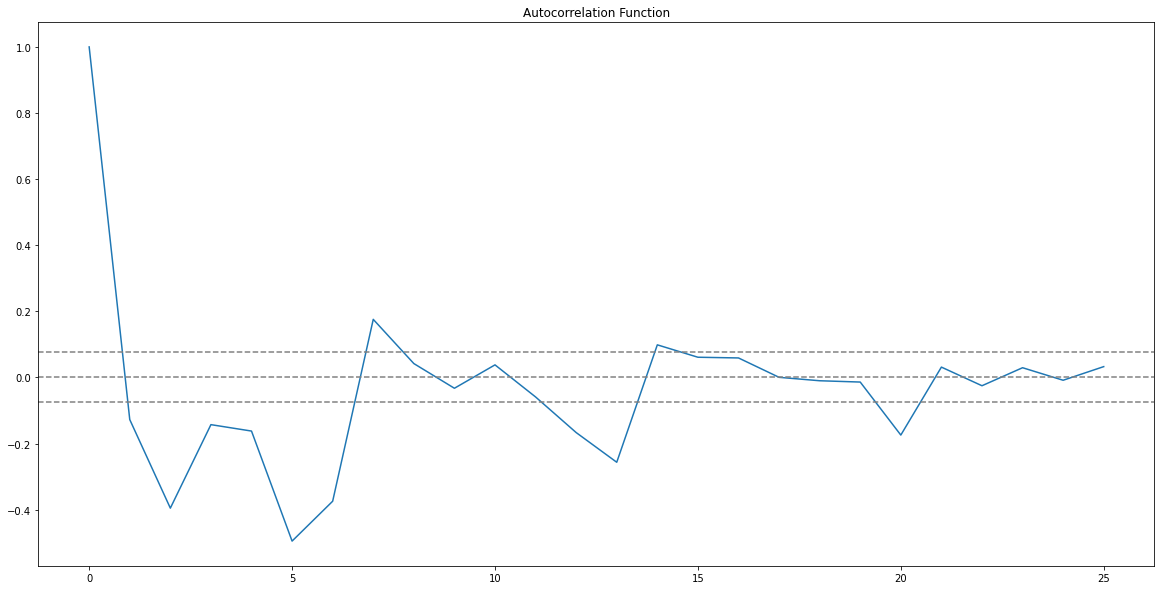

In [73]:
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())), 
            linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())), 
            linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.show()


plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())), 
            linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())), 
            linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.show()

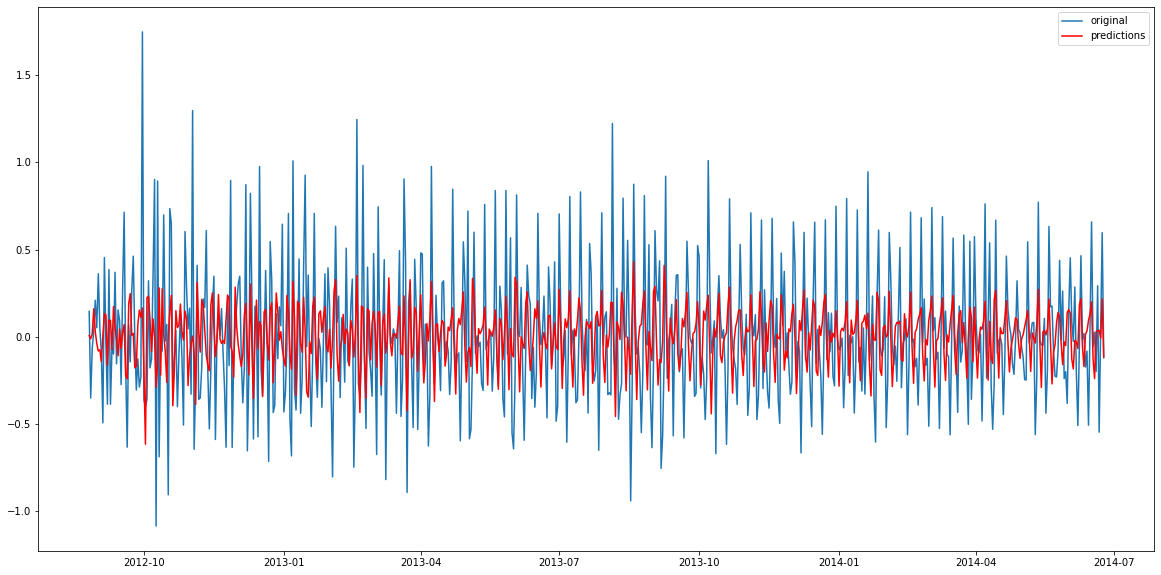

In [74]:
from statsmodels.tsa.arima_model import ARIMA

# here the q value is zero since it is just the AR model
model = ARIMA(Train_log, order = (2, 1, 0))
results_AR = model.fit(disp=-1)
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red',
         label = 'predictions')
plt.legend(loc='best')
plt.show()

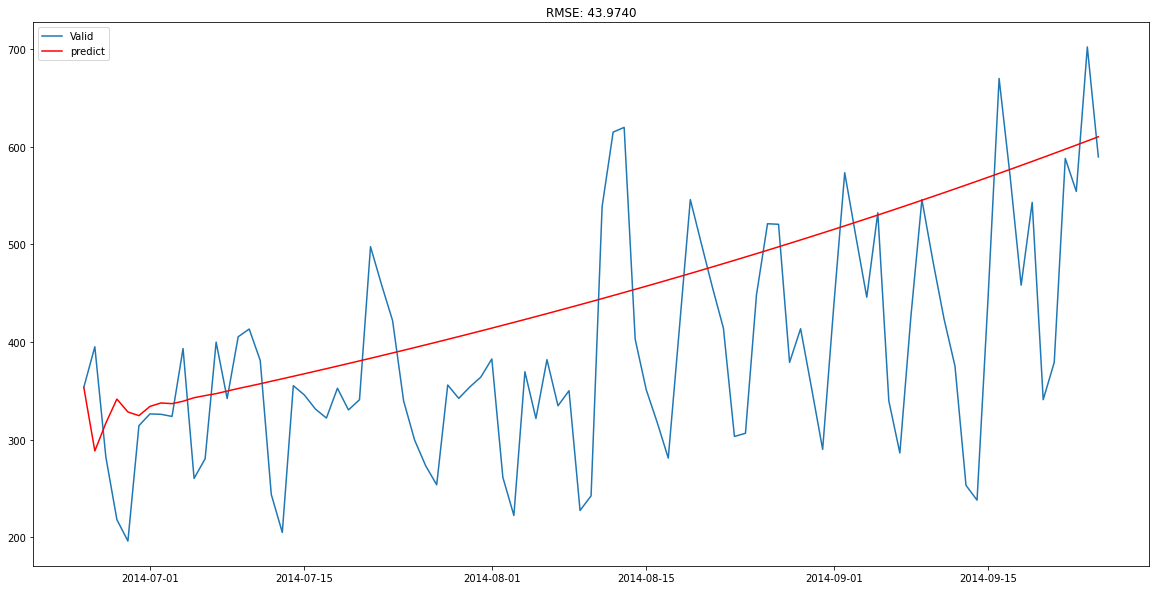

In [76]:
AR_predict = results_AR.predict(start='2014-06-25', end='2014-09-25')
AR_predict = AR_predict.cumsum().shift().fillna(0)

AR_predict1 = pd.Series(np.ones(valid.shape[0]) * 
                        np.log(valid['Count'])[0], index=valid.index)

AR_predict1 = AR_predict1.add(AR_predict, fill_value=0)
AR_predict = np.exp(AR_predict1)

plt.plot(valid['Count'], label='Valid')
plt.plot(AR_predict, color = 'red', label = 'predict')
plt.legend(loc='best')
plt.title('RMSE: %.4f' % (np.sqrt(np.dot(AR_predict,
                                         valid['Count']))/valid.shape[0]))
plt.show()

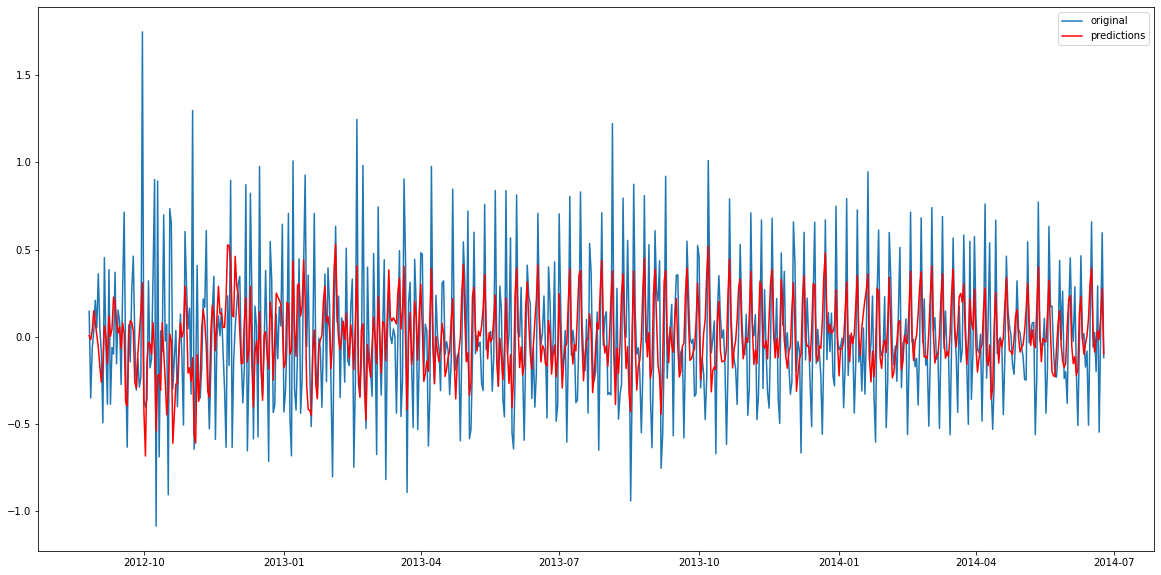

In [77]:
from statsmodels.tsa.arima_model import ARIMA

# here the p value is zero since it is just the MA model
model = ARIMA(Train_log, order = (0, 1, 2))
results_MA = model.fit(disp=-1)
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_MA.fittedvalues, color='red',
         label = 'predictions')
plt.legend(loc='best')
plt.show()

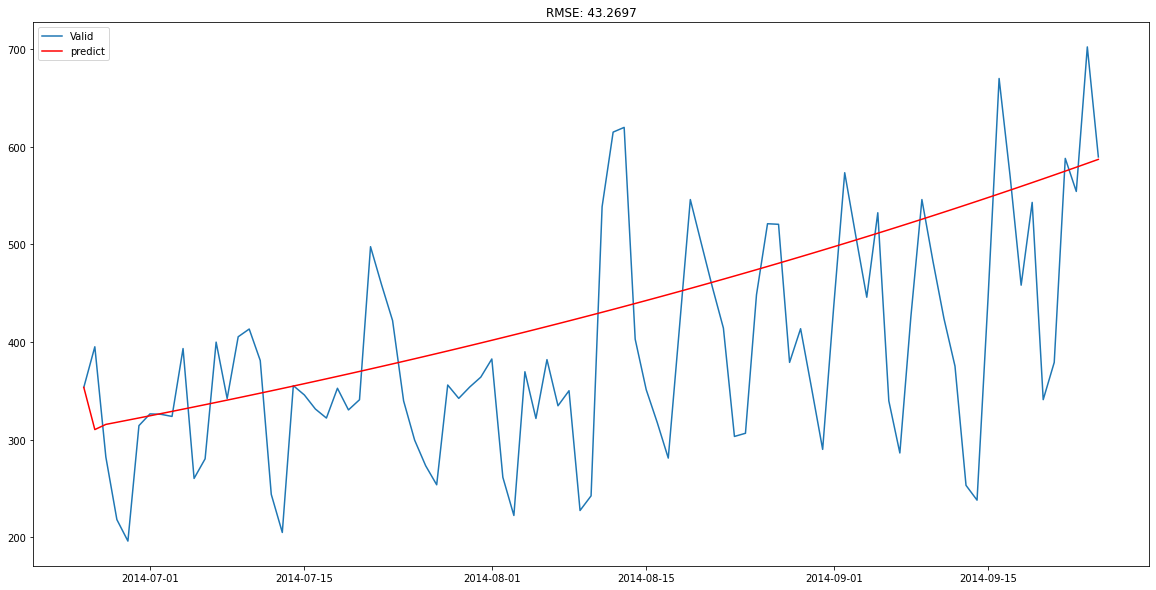

In [78]:
MA_predict = results_MA.predict(start='2014-06-25', end='2014-09-25')
MA_predict = MA_predict.cumsum().shift().fillna(0)

MA_predict1 = pd.Series(np.ones(valid.shape[0]) * 
                        np.log(valid['Count'])[0], index=valid.index)

MA_predict1 = MA_predict1.add(MA_predict, fill_value=0)
MA_predict = np.exp(MA_predict1)

plt.plot(valid['Count'], label='Valid')
plt.plot(MA_predict, color = 'red', label = 'predict')
plt.legend(loc='best')
plt.title('RMSE: %.4f' % (np.sqrt(np.dot(MA_predict,
                                         valid['Count']))/valid.shape[0]))
plt.show()

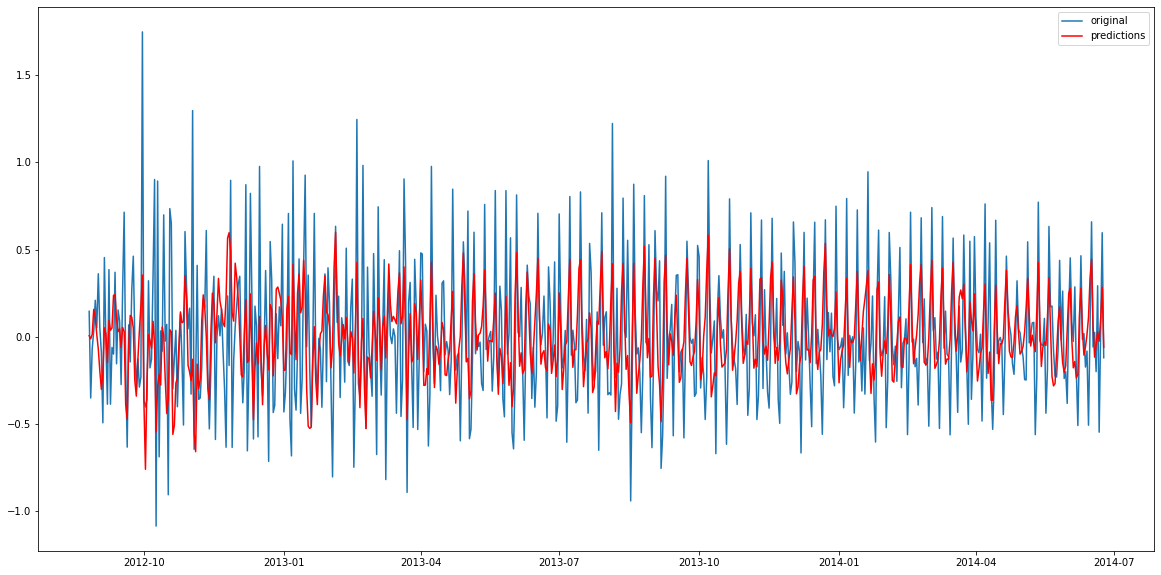

In [79]:
model = ARIMA(Train_log, order = (2, 1, 2))
results_ARIMA = model.fit(disp=-1)
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_ARIMA.fittedvalues, color='red',
         label = 'predictions')
plt.legend(loc='best')
plt.show()

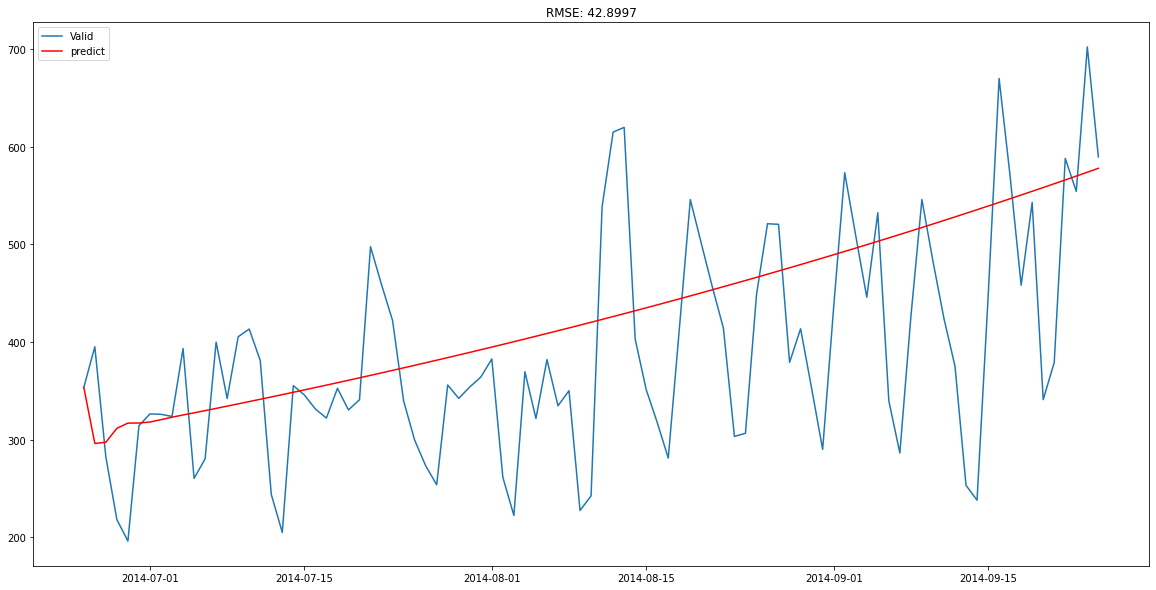

In [90]:
ARIMA_predict = results_ARIMA.predict(start='2014-06-25', end='2014-09-25')
ARIMA_predict = ARIMA_predict.cumsum().shift().fillna(0)

ARIMA_predict1 = pd.Series(np.ones(valid.shape[0]) * 
                        np.log(valid['Count'])[0], index=valid.index)

ARIMA_predict1 = ARIMA_predict1.add(ARIMA_predict, fill_value=0)
ARIMA_predict = np.exp(ARIMA_predict1)

plt.plot(valid['Count'], label='Valid')
plt.plot(ARIMA_predict, color = 'red', label = 'predict')
plt.legend(loc='best')
plt.title('RMSE: %.4f' % (np.sqrt(np.dot(ARIMA_predict,
                                         valid['Count']))/valid.shape[0]))
plt.show()